In [1]:
from utils import *
from numpy import linalg as LA

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


success = glob.glob("Data/Dict-Matrix-*[0-9]-RAF.txt")

nf_pairs = []

success_dict = {}

for file in success:
    Cs = []
    n = int(file.split("-")[2])
    f = float(file.split("-")[3])

    file1 = open(file, 'r')
    Lines = file1.readlines()
    

    if (n,f) not in success_dict:
        success_dict[(n,f)] = [ast.literal_eval(line) for line in Lines] 
    else:
        success_dict[(n,f)].append([ast.literal_eval(line) for line in Lines])
    



failure = glob.glob("Data/Dict-Matrix-*-Non-RAF.txt")
failure_dict= {}

for file in failure:
    Cs = []
    n = int(file.split("-")[2])
    f = float(file.split("-")[3])

    file1 = open(file, 'r')
    Lines = file1.readlines()
    

    if (n,f) not in failure_dict:
        failure_dict[(n,f)] = [ast.literal_eval(line) for line in Lines] 
    else:
        failure_dict[(n,f)].append([ast.literal_eval(line) for line in Lines])


keys1 = set(success_dict.keys())
keys2 = set(failure_dict.keys())

#Find the intersection of keys (common keys)
common_keys = keys1.intersection(keys2)
print(common_keys)                                   

#key = set([i for i in common_keys if i[0] == n]).pop()




{(2, 0.2)}


In [31]:
for key in common_keys:
    success = success_dict[key]
    failure = failure_dict[key]
    n = key[0]
    f = key[1]

    X,F,R = create_XFR(n)

    raf_count = len(success)

    matricies = [get_M(X,R, C) for C in success] #+[get_M(X,R, C) for C in failure]
    s = len(matricies)

    print(s)

    dist = np.zeros((s, s))

    for i in range(s):
        for j in range(i+1, s):
            dist[i,j] = LA.norm(matricies[i] - matricies[j], "fro")**2
    
    
    print(dist)

964
[[ 0. 10. 10. ...  8.  8.  8.]
 [ 0.  0.  8. ...  6.  6.  6.]
 [ 0.  0.  0. ...  6.  6.  6.]
 ...
 [ 0.  0.  0. ...  0.  4.  4.]
 [ 0.  0.  0. ...  0.  0.  4.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [32]:
np.max(dist)

22.0

In [33]:
k = 0
dist_dict ={}

while k < np.max(dist) +1:
#while k < 5:
    #clust = np.argwhere((dist < k) & (dist > 0))
    dist_dict[k] = np.argwhere((dist < k) & (dist > 0))
    k+=1
    

In [30]:
s

964

In [10]:
len(dist_dict[3])

3713923

In [21]:
list(dist_dict.keys())

[0, 1, 2, 3, 4, 5]

In [23]:
[len(dist_dict[i]) for i in list(dist_dict.keys())]

[0, 0, 1240264, 3713923, 3891576, 3894261]

Text(0, 0.5, 'Count')

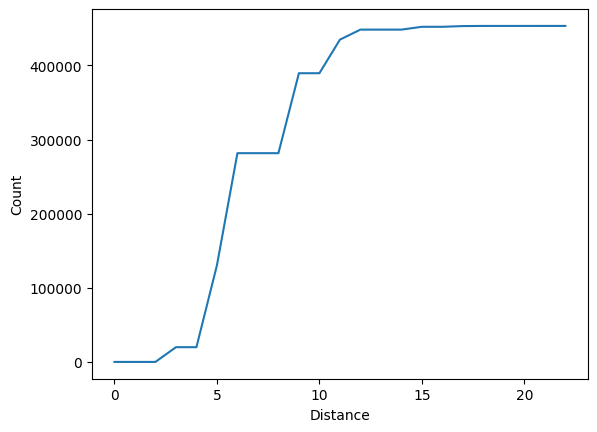

In [34]:
plt.title
plt.plot(list(dist_dict.keys()), [len(dist_dict[i]) for i in list(dist_dict.keys())])
plt.xlabel("Distance")
plt.ylabel("Count")


In [53]:
n = np.linspace(0,3,3)
f = np.linspace(0,3,10)
p = np.random.rand(10,3)

In [45]:
p

array([0.31070059, 0.48830187, 0.19277645, 0.4343254 , 0.88280243,
       0.75441064, 0.55308498, 0.63376942, 0.00942016, 0.68620803,
       0.61000069, 0.16931273, 0.2140555 , 0.17055952, 0.13982883,
       0.02451363, 0.87368154, 0.02158163, 0.65043221, 0.17695748,
       0.15996613, 0.19435084, 0.98166327, 0.48569459, 0.17209184,
       0.44343433, 0.20214111, 0.01913888, 0.34457407, 0.3289819 ])

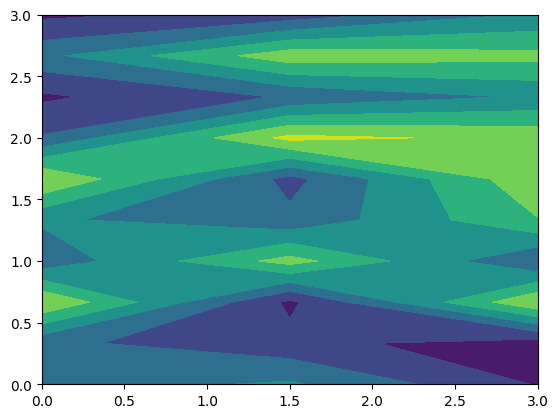

In [54]:

plt.contourf(n,f, p)
plt.show()